# **Read and visualize raster data**

- [Link to this lesson](https://carpentries-incubator.github.io/geospatial-python/06-raster-intro/index.html)

## Load data and visualize attributes

In [1]:
import pystac
items = pystac.ItemCollection.from_file("search.json")

In [2]:
# show item information from JSON file
items

In [3]:
# show the first item properties
import rioxarray
items[0]

<Item id=S2A_31UFU_20200328_0_L2A>

- Obtain the ``href`` for the ``nir09-jp2``

In [4]:
nir9_href = items[0].assets["nir09"].href

- Retrieve fthe nir9 image from the ``href`` we just obtained from ``assets``

In [5]:
raster_ams_b9 = rioxarray.open_rasterio(nir9_href)
raster_ams_b9

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

- Inspect data value and attributes

In [6]:
raster_ams_b9.x.values

array([600030., 600090., 600150., ..., 709650., 709710., 709770.])

In [7]:
raster_ams_b9.sel(band=1, x=600030)

<xarray.DataArray (y: 1830)>
[1830 values with dtype=uint16]
Coordinates:
    band         int64 1
    x            float64 6e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

- Check some geospatial attributes

In [8]:
# geospatial functionalities
raster_ams_b9.rio

In [9]:
raster_ams_b9.rio.crs

CRS.from_epsg(32631)

In [10]:
raster_ams_b9.rio.nodata

0

In [11]:
# bounds is a method of xarray methods after importing rioxarrayb
raster_ams_b9.rio.bounds()

(600000.0, 5790240.0, 709800.0, 5900040.0)

In [12]:
raster_ams_b9.rio.width

1830

In [13]:
raster_ams_b9.rio.height

1830

- Inspect the values of the raster data

In [14]:
raster_ams_b9.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

In [15]:
raster_ams_b9_values = raster_ams_b9.values

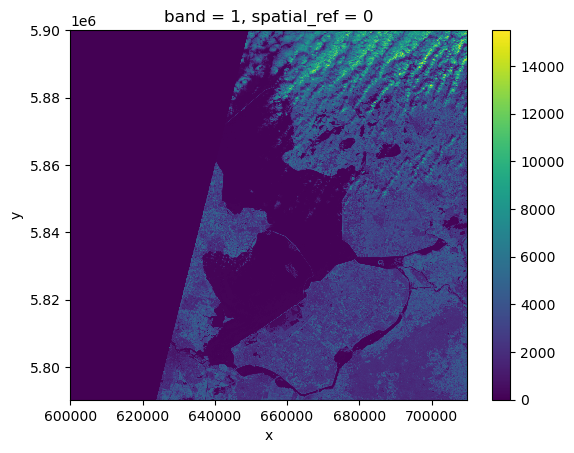

In [17]:
raster_ams_b9.plot()

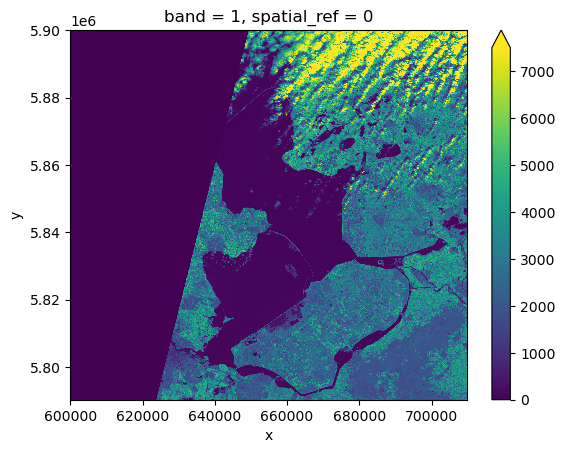

In [21]:
raster_ams_b9.plot(robust=True)

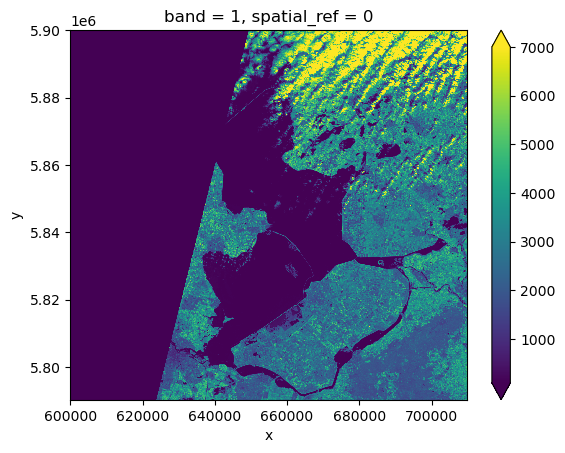

In [23]:
# stretch the image
raster_ams_b9.plot(vmin=100,vmax=7000)

## Visualize CRS of a raster image

In [24]:
type(raster_ams_b9.rio.crs.to_epsg())

int

In [25]:
epsg = raster_ams_b9.rio.crs.to_epsg()
epsg

32631

- Inspect CRS using ``pyproj`` library

In [26]:
from pyproj import CRS
crs = CRS(epsg)
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
# to get the names of methods
dir(crs)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'srs',
 'sub_crs_list',
 'targ

In [27]:
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

- Calculate a few basic stats for the band 9 of the image (NIR)

In [33]:
raster_ams_b9.min()

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0

In [32]:
raster_ams_b9.mean()

<xarray.DataArray ()>
array(1652.44009944)
Coordinates:
    spatial_ref  int64 0

In [34]:
raster_ams_b9.mean().values

array(1652.44009944)

In [35]:
raster_ams_b9.std().values

array(2049.16447495)

In [37]:
raster_ams_b9.quantile([0,0.25,0.5,0.75,1])

<xarray.DataArray (quantile: 5)>
array([    0.,     0.,   336.,  2911., 15497.])
Coordinates:
  * quantile  (quantile) float64 0.0 0.25 0.5 0.75 1.0

- You can run ``numpy`` and ``scipy`` functions on xarray structires

In [38]:
import numpy as np

In [39]:
np.percentile(raster_ams_b9, 25)

0.0

## Deal with missing data

In [41]:
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

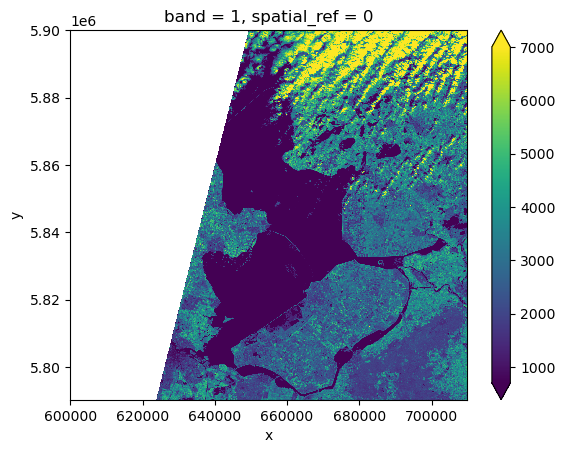

In [44]:
raster_ams_b9.plot(vmin=700,vmax=7000)

- Test the percentile

In [45]:
np.percentile(raster_ams_b9, 0)

nan

In [48]:
raster_ams_b9.min().values

array(8., dtype=float32)

In [42]:
raster_ams_b9.where(raster_ams_b9!=raster_ams_b9.rio.nodata)

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[   nan,    nan,    nan, ...,  8888.,  9075.,  8139.],
        [   nan,    nan,    nan, ..., 10444., 10358.,  8669.],
        [   nan,    nan,    nan, ..., 10346., 10659.,  9168.],
        ...,
        [   nan,    nan,    nan, ...,  4295.,  4289.,  4320.],
        [   nan,    nan,    nan, ...,  4291.,  4269.,  4179.],
        [   nan,    nan,    nan, ...,  3944.,  3503.,  3862.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

## Band math and multi-band handling

- Change the `overview_level` can return an xarray of different size (zoomed in/out)

In [55]:
# show an overview of visible bands only (3 bands)
raster_ams_overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=2)
raster_ams_overview

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
[5655387 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [56]:
raster_ams_overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=3)
raster_ams_overview

<xarray.DataArray (band: 3, y: 687, x: 687)>
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.001e+05 6.002e+05 ... 7.096e+05 7.097e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [57]:
raster_ams_overview.sel(band=1).shape

(687, 687)

In [58]:
raster_ams_overview.shape

(3, 687, 687)

- Visualize the multi-band xarray

(array([481980., 235209., 318654., 131536.,  55567.,  37719.,  30584.,
         22951.,  21211.,  80496.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

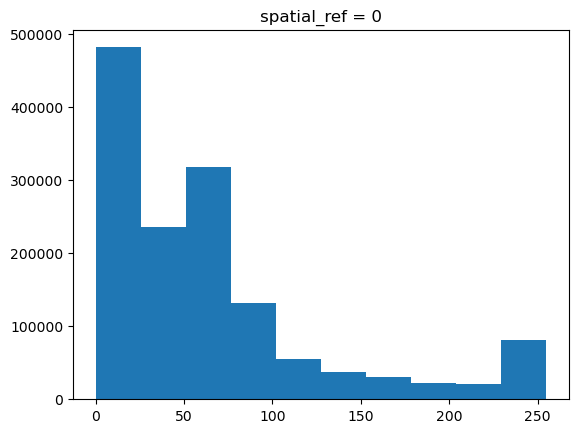

In [60]:
raster_ams_overview.plot()

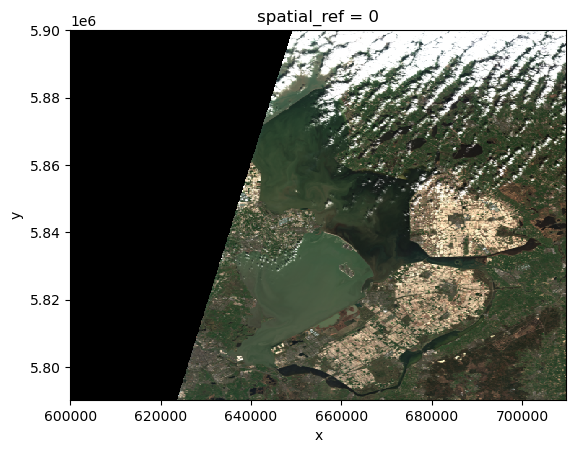

In [59]:
raster_ams_overview.plot.imshow()